 ###  Polynomial Regression - Exercises

 ---

In this exercise, we will perform polynomial regression as introduced in the lecture.

Our toy problem will be to based on the sine function, which we will use to sample a dataset.
We will try to fit a polynomial to approximate the values sampled from the sine function and investigate how the degree of the polynomial influences the result quality.

We will also add regularization to the regression model and perform ridge regression on the same dataset.

You are more than welcome to go beyond the concrete tasks in this notebook and, e.g., vary underlying function, data amount, or parameters.

#### Setup
Once again, we start by importing required packages.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# setting seed for reproducibility
np.random.seed(2)

Implement the function ```true_function()``` which is the function we will try to estimate using linear regression in this exercise.
The function takes an array of x-values and returns the corresponding sine-values at the positions $2 \pi \cdot x$. 

The function ```np.sin()``` applies the sine function pointwise and can be used to compute the sine of all array entries at once. 
The constant $\pi$ is available as ``np.pi``.

In [3]:
### YOUR SOLUTION HERE
def true_function(x):
    return np.sin(2*np.pi*x)
### END OF SOLUTION

# sanity check: function value for x=1 and x=0.5 should be (close to) 0.
assert abs(true_function(np.array([1])))[0] < 1e-9
assert abs(true_function(np.array([0.5])))[0] < 1e-9

Next, we will create sample data for training and testing of our polynomial regression model.

Instantiate arrays ```x_train``` and ```x_test``` of dimensions ```(n_samples_train, 1)``` and ```(n_samples_test, 1)```, respectively. 
Once we have fitted our polynomial to the training data we will use the test data to evalute how well the predicted function generalizes to new data.

The values for both arrays shall be sampled from a uniform distribution in the range of 0 to 1. Therefore, use ```numpy's``` function ```np.random.uniform()```.

Using the previously implemented function ```true_function()```, the corresponding y-values ```y_train``` and ```y_test``` can be computed.
Analogously to the previous exercise, add normally distributed noise of mean 0 and standard deviation 0.15 to the values of ```y_train``` and ```y_test``` (use ``np.random.normal()``).

In [5]:
# number of input sampels
n_samples_train = 12
n_samples_test = 10

### YOUR SOLUTION HERE
# sampling x-values in the range (0, 1)
# sampling gaussian noise
# adding noise to obtain the noisy y-values for training and test data
x_train = np.random.uniform(0,1, [n_samples_train, 1])
x_test = np.random.uniform(0,1, [n_samples_test, 1])

y_train = true_function(x_train)
y_test = true_function(x_test)

y_train += np.random.normal(0,0.15,size=y_train.shape)
y_test += np.random.normal(0,0.15,size=y_test.shape)



### END OF SOLUTION

#### Polynomial feature creation

Implement the function ```compute_polynomial_features()``` which is used for the creation of the polynomial features (in the 1-dimensional case). 

The function takes two arguments: an array of x-values of shape ``(n,1)`` and the degree ``k`` of the polynomial.
It returns the corresponding polynomial features in a 2-dimensional array of shape ``(n,k+1)``.

In [7]:
### YOUR SOLUTION HERE
def compute_polynomial_features(x, k):
    features = []
    for d in range(k+1):
        features.append(x**d)
    return np.concatenate(features, axis = 1)
### END OF SOLUTION

#### Mean Squared Error

In order to evaluate performance of the regression, implement the function ```mse()``` to compute the mean squared error for the training and test data. 
For two input arrays ```y_pred``` and ```y_true``` of identical shape ``(n,1)`` the function returns the mean squared error (single scalar value) as defined in the lecture.

We also create an instance of PyTorch's class ``MSELoss`` to later compare our results to the existing implementation.

In [9]:
### YOUR SOLUTION HERE
def mse(y_pred, y_true):
    n_samples = y_pred.shape[0]
    losses = 0
    for i in range(n_samples):
        loss = (y_pred[i, 0]-y_true[i, 0])**2
        losses += loss 
    mse = 1/n_samples*losses
    return mse
### END OF SOLUTION

# pytorch implementation of mse
loss_fn = nn.MSELoss()

#### Polynomial Regression

We use the function ```compute_polynomial_features()``` to create matrices ```x_train_polynomial``` and ```x_test_polynomial``` containing all the features required for polynomial regression.

In a next step, we fit a polynomial function to our test data by computing the polynomial parameters $ w_{\text{pred}} $ using the closed form solution $ \mathbf{w}_{\text{pred}} = (\mathbf{X}_{\text{train}}^{\top} \mathbf{X}_{\text{train}})^{-1} \mathbf{X}_{\text{train}}^{\top} \mathbf{y}_{\text{train}}$.

Given the predicted parameters we compute the y-values predicted by the fitted polynomial function for both our training and test data.

In [ ]:
# generate polynomial features for diven polynomial degree using implemented method
degree = 3
x_train_polynomial = compute_polynomial_features(x_train, degree)
x_test_polynomial = compute_polynomial_features(x_test, degree)

### YOUR SOLUTION HERE
x_train_polynomial_T = np.transpose(x_train_polynomial)
inversed = np.linalg.inv(np.matmul(x_train_polynomial_T, x_train_polynomial))
w_pred = np.matmul(inversed, x_train_polynomial_T)
w_pred = np.matmul(w_pred, y_train)
### END OF SOLUTION

# compute train and test predictions using computed weights 
y_pred_train = np.matmul(x_train_polynomial, w_pred)
y_pred_test = np.matmul(x_test_polynomial, w_pred)

Next, we will compute the mean squared error for test and training data using the previously implemented function ``mse()``.
Store the results in two variables ``mse_train`` and ``mse_test``, respectively.

We compare the results returned by ```mse()``` to the pytorch implementation of the MSE. 
Apart from rounding errors, they should both return identical values.

In [19]:
### YOUR SOLUTION HERE
# compute mse using implemented mse method

mse_train = mse(y_pred_train, y_train)
mse_test = mse(y_pred_test, y_test)

### END OF SOLUTION

# compute mse using pytorch implementation for comparison
mse_train_torch = loss_fn(torch.tensor(y_pred_train), torch.tensor(y_train))
mse_test_torch = loss_fn(torch.tensor(y_pred_test), torch.tensor(y_test))

# check that custom mse implementation equals pytorch implementation
assert np.isclose(mse_train, mse_train_torch)
assert np.isclose(mse_test, mse_test_torch)

Let's print the resulting error values to the console.

In [20]:
print(f"Polynomial of degree {degree}: \n")
print(f"MSE Training: {mse_train}")
print(f"MSE Test: {mse_test}")

Polynomial of degree 3: 

MSE Training: 0.017459497339982925
MSE Test: 0.052868487188158224


 #### Visualization
 
The function ```visualize_results()``` can be used to visualize the estimated polynomial function alongside the training data and the true function, i.e. the sine function.

In [21]:
def visualize_results(x_train, y_train, x_test, y_test, w_pred, degree):
    fig, axes = plt.subplots(1, 1, figsize=(6, 6))
    axes.scatter(x_train, y_train, label='Train Samples', color='seagreen')
    axes.scatter(x_test, y_test, label='Test Samples', color='orangered')

    x = np.linspace(0, 1, 1000).reshape(-1, 1)
    x_feat = compute_polynomial_features(x, degree)
    y_true = true_function(x)
    y_pred = np.matmul(x_feat, w_pred)
    axes.plot(x, y_true, label='True Function')
    axes.plot(x, y_pred, label='Predicted Function', color='seagreen', linestyle='--')
    
    axes.set_ylim([-1.5, 1.5])
    axes.set_xlabel(r'$x$', fontsize=14)
    axes.set_ylabel(r'$y$', fontsize=14)
    plt.legend(fontsize=14)

Use ``visualize_results()`` to manually inspect the results.

Try different polynomial degrees and investigate how the results vary.

What can you say about the training samples and the amount thereof? Feel free to try again with different amounts of training (test) data.
 
What happens if x-values outside the interval $[0, 1)$ are considered at test time?

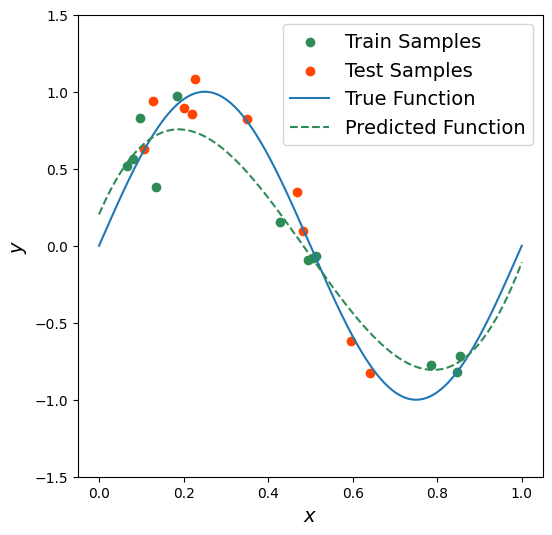

In [22]:
visualize_results(x_train, y_train, x_test, y_test, w_pred, degree)

### Ridge Regression

Next, we will add regularization to the same regression problem.

To do so, first compute the regularization term using ``lambda_reg`` as parameter $\lambda$. You can make use of ```np.eye()``` to create an identity matrix for the computation of the regularization term.

Then, implement the closed form solution including regularization term to compute the parameters ```w_pred_reg```.

Compare the magnitudes of the predicted polynomial parameters ```w_pred_reg``` to the previous solution ```w_pred```. What can you observe?

In [31]:
lambda_reg = 1e-5

### YOUR SOLUTION HERE
# Compute regularization term
# Compute polynomial parameters using closed form solution including regularization
lambda_i = lambda_reg * np.eye(x_train.shape[1])
w_pred_reg = np.linalg.inv(x_train_polynomial_T@x_train_polynomial + lambda_i) @ x_train_polynomial_T @ y_train
### END OF SOLUTION

y_pred_train_ridge = np.matmul(x_train_polynomial, w_pred_reg)
y_pred_test_ridge = np.matmul(x_test_polynomial, w_pred_reg)

mse_train_ridge = mse(y_pred_train_ridge, y_train)
mse_test_ridge = mse(y_pred_test_ridge, y_test)

Again, print computed MSE values.

How does the regularization and its magnitude influence the error values?

In [32]:
print(f"Polynomial of degree {degree}: \n")
print(f"MSE Training Ridge Regression: {mse_train_ridge}")
print(f"MSE Test Ridge Regression: {mse_test_ridge}")

Polynomial of degree 3: 

MSE Training Ridge Regression: 0.01745949734099296
MSE Test Ridge Regression: 0.05286794358265904


 The function ``visualize_results()`` can again be used to inspect the results in a 2-dimensional plot.
 
 Try different regularization values $\lambda$ and investigate how the results change.

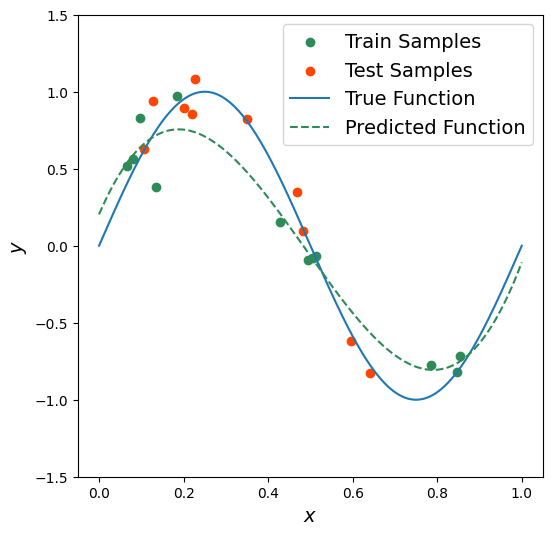

In [33]:
visualize_results(x_train, y_train, x_test, y_test, w_pred_reg, degree)